In [29]:
import pandas as pd
import numpy as np

all_training_data=pd.read_csv('../input/zh2022/train_data.csv')
training_data=all_training_data[['x1','x2']].to_numpy()
training_labels=all_training_data['y'].to_numpy()

all_testing_data=pd.read_csv('../input/zh2022/test_data.csv')
testing_data=all_testing_data[['x1','x2']].to_numpy()
testing_labels=all_testing_data['y'].to_numpy()


a, Transform the data using a polynomial transformation (degree=3). Do NOT include cross-terms (interactions) only pure terms are required.

In [30]:
def poly3(data):
    #1,x,y,x2,y2,x3,y3
    result = np.zeros((data.shape[0],7))
    for i in range(data.shape[0]):
        x,y = data[i][0],data[i][1]
        result[i][0] = 1
        result[i][1] = x
        result[i][2] = y
        result[i][3] = x*x
        result[i][4] = y*y
        result[i][5] = x*x*x
        result[i][6] = y*y*y
    return result

poly_training_data = poly3(training_data)
poly_testing_data = poly3(testing_data)

b, Implement a function that calculates classification accuracy

In [31]:
def accuracy(true_labels,predicted_labels):
    return np.mean(true_labels == predicted_labels)

c, Implement the Pocket algorithm in order to perform binary classification. Do not forget about the bias term.

In [34]:
class Pocket():
    def __init__(self):
        self.w_hat = None
        self.bias = None
    def fit(self,data,labels):
        data_wth_bias = np.hstack((np.ones((data.shape[0],1)),data))
        max_iterations = 1000
        w = np.random.rand(data_wth_bias.shape[1])
        done = False
        count = 0
        pocket = w
        while not done and count < max_iterations:
            for x,y in zip(data_wth_bias, labels):
                done = True
                y_hat = np.sign(x@w)
                if y_hat != y:
                    done = False
                    w += x*y
                prediction = np.sign(data_wth_bias@w)
                acc = accuracy(labels, prediction)
                pocket_prediction = np.sign(data_wth_bias@pocket)
                pocket_accuracy = accuracy(labels, pocket_prediction)
                if acc > pocket_accuracy:
                    pocket = w
                count += 1
        self.w_hat = w[1:]
        self.bias = w[0]
    def predict(self,data):
        return np.sign(data @ self.w_hat + self.bias)

d, Use your implemented Pocket algorithm to train a classifier using the training data and predict class labels on both the training and the testing data. Use your implemented accuracy function to assess the classification performance achieved on the training and the testing data as well.

In [35]:
model = Pocket()
model.fit(poly_training_data, training_labels)
prediction_in = model.predict(poly_training_data)
accuracy_in = accuracy(training_labels, prediction_in)
prediction_out = model.predict(poly_testing_data)
accuracy_out = accuracy(testing_labels, prediction_out)
print(f"Accuracy on training data: {accuracy_in} \nAccuracy on testing data: {accuracy_out}")

Accuracy on training data: 0.7775 
Accuracy on testing data: 0.855


e, Visualize training and test error (not accuracy) as a function of training iterations

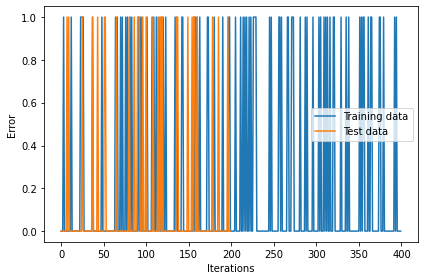

In [53]:
def visualize_errors(train_errors,test_errors):
    import matplotlib.pyplot as plt
    plt.plot(train_errors,label='Training data')
    plt.plot(test_errors,label='Test data')
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.legend()
    plt.tight_layout()
    plt.show()

# train_errors = training_labels!=prediction_in
# test_errors = testing_labels!=prediction_out
visualize_errors(train_errors,test_errors)